AMROUCHE Matyas, MACEDOS André

# Projet d'Econométrie SES722

## Partie 1. Régression

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy.stats import t, f, chi2

sns.set_style('darkgrid')

### 1. Lire le fichier mroz.txt. Ne sélectionner que les observations pour lesquelles la variable wage est strictement positive.

In [2]:
df = pd.read_csv('MROZ.raw', sep='\s+', header= None)
df = df.rename(columns={0:'inlf',
                      1:'hours',
                     2:'kidslt6',
                     3:'kidsge6',
                     4:'age',
                     5:'educ',
                     6:'wage',
                     7:'repwage',
                     8:'hushrs',
                     9:'husage',
                     10:'huseduc',
                     11:'huswage',
                     12:'faminc',
                     13:'mtr',
                     14:'motheduc',
                     15:'fatheduc',
                     16:'unem',
                     17:'city',
                     18:'exper',
                     19:'nwifeinc',
                     20:'lwage',
                     21:'expersq'})

In [3]:
df.head()

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1610,1,0,32,12,3.354,2.65,2708,34,...,16310,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800,0.6615,7,7,11.0,1,5,19.499980,.3285121,25
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,21040,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,1,456,0,3,34,12,1.0965,3.25,1920,53,...,7300,0.7815,7,7,5.0,0,6,6.799996,.0921233,36
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,...,27300,0.6215,12,14,9.5,1,7,20.100060,1.524272,49


In [4]:
print("Nombre d'observations:", len(df))

Nombre d'observations: 753


In [5]:
# Conversion de l'atribut wage en flottant

def convert_float(s):
    if s != '.':
        return float(s)
    else:
        return 0.0
    
df.wage = df.wage.apply(convert_float)

In [6]:
# Selectionner les observations pour lesquelles la variable wage est strictement positive
df = df[df.wage > 0]

In [7]:
print("Nombre d'observations après nettoyage:", len(df))

Nombre d'observations après nettoyage: 428


### 2. Faire les statistiques descriptives du salaire, de l’age et de l’éducation pour l’ensemble des femmes puis, pour les femmes dont le salaire du mari est supérieure à la médiane de l’échantillon, puis pour les femmes dont le salaire du mari est inférieur à la médiane de l’échantillon

In [8]:
def stats(df):
    '''Methode qui output les stats descriptives d'un ensemble d'observations
    '''
    stats_dict = {'wage': dict(),
                  'age': dict(),
                  'educ': dict()}
    
    for att in stats_dict.keys():
        tmp_dict = stats_dict[att]
        tmp_dict['mean'] = np.mean(df[att])
        tmp_dict['std'] = np.std(df[att])
        tmp_dict['min'] = np.min(df[att])
        tmp_dict['max'] = np.max(df[att])

    stats_dict['cov'] = np.cov(df[['wage', 'age', 'educ']], rowvar=False)
    stats_dict['corr'] = np.corrcoef(df[['wage', 'age', 'educ']], rowvar=False)
    
    return stats_dict

def display_stats(stats_dict):
    '''Methode qui affiche les stats descriptives d'un dictionnaire
    '''
    print('-----------------------------------------------------')
    print('| Attribute |  mean   |  std   |    min   |    max   |')
    print('-----------------------------------------------------')
    for att in ('wage', 'age ', 'educ'):
        print('|    ' + att + '   |  {:5.2f}  |  {:4.2f}  |  {:6.3f}  |  {:6.3f}  |'\
              .format(stats_dict[att.strip()]['mean'], stats_dict[att.strip()]['std'], 
                      stats_dict[att.strip()]['min'], stats_dict[att.strip()]['max']))
    print('-----------------------------------------------------')
    print('\nCovariance matrix:')
    print(stats_dict['cov'])
    print('\nCorrelation matrix:')
    print(stats_dict['corr'])

**Statistiques pour l'ensemble de femmes:**

In [9]:
print('Ensemble de femmes:\n')
display_stats(stats(df))

Ensemble de femmes:

-----------------------------------------------------
| Attribute |  mean   |  std   |    min   |    max   |
-----------------------------------------------------
|    wage   |   4.18  |  3.31  |   0.128  |  25.000  |
|    age    |  41.97  |  7.71  |  30.000  |  60.000  |
|    educ   |  12.66  |  2.28  |   5.000  |  17.000  |
-----------------------------------------------------

Covariance matrix:
[[10.95796949  0.77685054  2.58696699]
 [ 0.77685054 59.61513712 -0.92059358]
 [ 2.58696699 -0.92059358  5.22294206]]

Correlation matrix:
[[ 1.          0.03039444  0.34195443]
 [ 0.03039444  1.         -0.05217135]
 [ 0.34195443 -0.05217135  1.        ]]


**Statistiques pour les femmes dont le salaire du mari est supérieure à la médiane de l’échantillon:**

In [10]:
df2 = df[df.huswage > np.median(df.huswage)]

print('Femmes dont le salaire du mari est supérieure à la médiane de l’échantillon:\n')
display_stats(stats(df2))

Femmes dont le salaire du mari est supérieure à la médiane de l’échantillon:

-----------------------------------------------------
| Attribute |  mean   |  std   |    min   |    max   |
-----------------------------------------------------
|    wage   |   4.90  |  4.03  |   0.162  |  25.000  |
|    age    |  42.28  |  7.37  |  30.000  |  59.000  |
|    educ   |  13.24  |  2.35  |   5.000  |  17.000  |
-----------------------------------------------------

Covariance matrix:
[[16.33457865 -0.33098978  3.27145368]
 [-0.33098978 54.59499364 -1.14242464]
 [ 3.27145368 -1.14242464  5.56509148]]

Correlation matrix:
[[ 1.         -0.01108369  0.34312365]
 [-0.01108369  1.         -0.06554129]
 [ 0.34312365 -0.06554129  1.        ]]


**Statistiques pour les femmes dont le salaire du mari est inférieur à la médiane de l’échantillon:**

In [11]:
df3 = df[df.huswage < np.median(df.huswage)]

print('Femmes dont le salaire du mari est inférieur à la médiane de l’échantillon:\n')
display_stats(stats(df3))

Femmes dont le salaire du mari est inférieur à la médiane de l’échantillon:

-----------------------------------------------------
| Attribute |  mean   |  std   |    min   |    max   |
-----------------------------------------------------
|    wage   |   3.46  |  2.14  |   0.128  |  18.267  |
|    age    |  41.67  |  8.03  |  30.000  |  60.000  |
|    educ   |  12.07  |  2.05  |   6.000  |  17.000  |
-----------------------------------------------------

Covariance matrix:
[[ 4.59362296  1.44942576  1.07056361]
 [ 1.44942576 64.72978369 -1.05958492]
 [ 1.07056361 -1.05958492  4.21973586]]

Correlation matrix:
[[ 1.          0.08405552  0.24316002]
 [ 0.08405552  1.         -0.06411226]
 [ 0.24316002 -0.06411226  1.        ]]


### 3. Faire l'histogramme de la variable wage. Calculer le log de wage et faire l'histogramme. Comparez les deux histogrammes et commentez

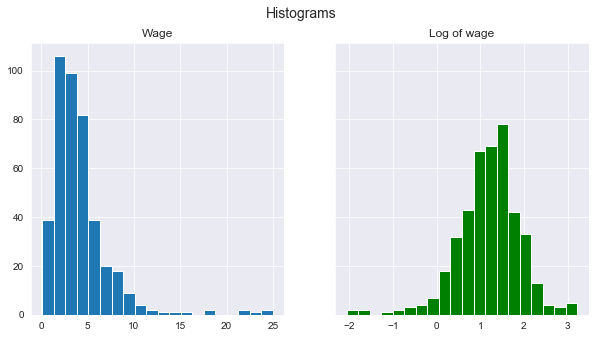

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
axs[0].hist(df.wage, bins=20);
axs[0].set_title('Wage')
axs[1].hist(df.wage.apply(np.log), bins=20, color='g')
axs[1].set_title('Log of wage')
plt.suptitle('Histograms', fontsize=14);

On peut noter que l'histogramme de la variable *wage* rassemble à une distribution log-normal alors que l'histogramme du log de la variable *wage* rassemble à une distribution normal

### 4. Calculer les corrélations motheduc et fatheduc. Commentez. Il y a-t-il un problème de multicollinéarité si l'on utilise ces variables comme variables explicatives ?

In [13]:
print('Matrice de corrélation entre motheduc et fatheduc: \n')
print(np.corrcoef(df[['motheduc', 'fatheduc']], rowvar=False))

Matrice de corrélation entre motheduc et fatheduc: 

[[1.         0.55406322]
 [0.55406322 1.        ]]


Comme la corrélation entre ces deux variables n'est pas proche de 1 il n'y aura pas de multicollinéarité si l'on utilise ces variables comme variables explicatives.

### Faites un graphique en nuage de point entre wage et educ, wage et exper, wage et fatheduc. Commentez. S'agit-il d'un effet "toute chose étant égale par ailleurs ?"

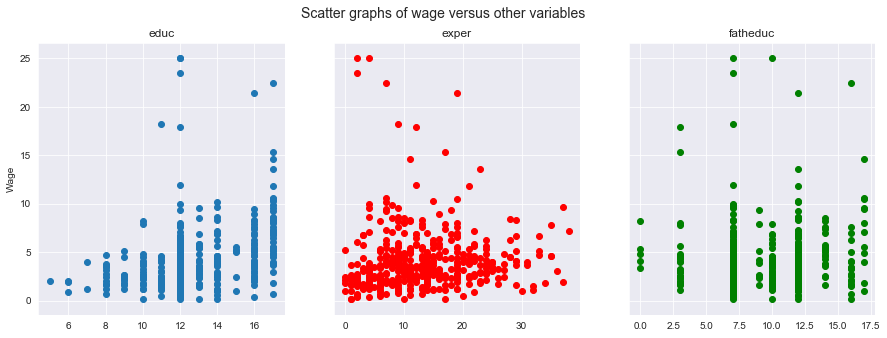

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
axs[0].scatter(df.educ, df.wage)
axs[0].set_title('educ')
axs[0].set_ylabel('Wage')
axs[1].scatter(df.exper, df.wage, color='r')
axs[1].set_title('exper')
axs[2].scatter(df.fatheduc, df.wage,color='g')
axs[2].set_title('fatheduc')
plt.suptitle('Scatter graphs of wage versus other variables', fontsize=14);

En analysant les nuages de point on peut voir que la variable *wage* n'est pas directement prédite par une variation unique d'une des variables *educ*, *exper* et *fatheeduc*. Alors, cela ne s'agit pas d'un effet **"toute chose étant égale par ailleurs"**.

### 6. Quelle est l'hypothèse fondamentale qui garanti des estimateurs non biaisés ? Expliquer le biais de variable omise

L'hypothèse fondamentale pour la grantie des estimateurs non biaisés est que la variable non-observée soit de moyenne nulle et que la variable non-observée ne dépende pas des variables explicatives. 

Le biais de variable omise c'est un effet qui apparait quand il y a une ou plus de variables que nous pouvons pas mésurer et qui ne sont pas prises en comptes dans la régression, mais qui ont une corrélation avec les autres variables explicatives et/ou la variable à expliquer. Dans telle situation, la variable non-observée du modèle agrège toutes les variables que nous pouvons pas mésurer. Alors, dans ce cas l'hypothèse de moyenne nulle et de non-corrélation de la variable non-observée n'est pas respectée.

### 7. Faire la régression de wage en utilisant les variables explicatives un constante, city, educ, exper, nwifeinc, kidslt6, kidsgt6. Commentez l'histogramme des résidus.

In [15]:
# Creating dataframe with constant to be fed to OLS model
X = sm.add_constant(df[['city', 'educ', 'exper', 'nwifeinc', 'kidslt6', 'kidsge6']])
model = sm.OLS(df.wage, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     10.23
Date:                Sat, 27 Apr 2019   Prob (F-statistic):           1.41e-10
Time:                        19:04:46   Log-Likelihood:                -1090.0
No. Observations:                 428   AIC:                             2194.
Df Residuals:                     421   BIC:                             2222.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4035      0.963     -2.495      0.0

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


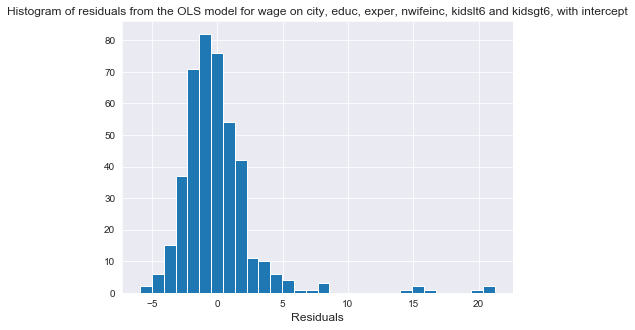

In [16]:
# Residuals histogram
plt.figure(figsize=(7,5))
plt.hist(results.resid, bins=30)
plt.title('Histogram of residuals from the OLS model for wage on city, educ, exper, nwifeinc, kidslt6 and kidsgt6, with intercept', fontsize=12)
plt.xlabel('Residuals', fontsize=12);

Cet histogramme peut s'approcher d'une distribution gaussienne comme on espère avec une régression linéaire, par contre il y a une quantité non-négligeable d'outliers qui peuvent nous donner l'indice que ce modèle n'est pas le meilleur pour expliquer la variable *wage*

### 8. Faire la régression de lwage sur une constante, city, educ, exper, nwifeinc, kidslt6, kidsgt6. Comparer l’histogramme obtenu à celui de la question 7.

In [17]:
# Apply model on lwage after transforming variable type to float
model_log = sm.OLS(df.lwage.apply(float), X)
results_log = model_log.fit()

print(results_log.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     12.92
Date:                Sat, 27 Apr 2019   Prob (F-statistic):           2.00e-13
Time:                        19:04:49   Log-Likelihood:                -431.92
No. Observations:                 428   AIC:                             877.8
Df Residuals:                     421   BIC:                             906.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3990      0.207     -1.927      0.0

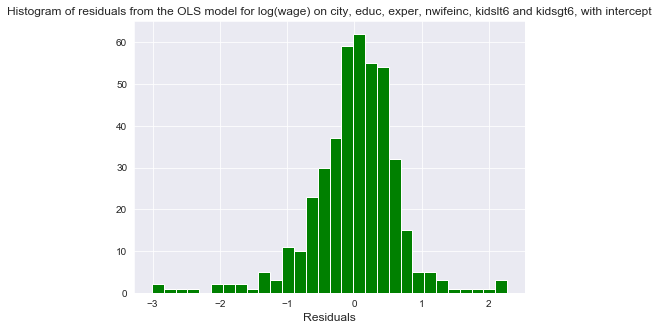

In [18]:
# Residuals histogram for log(wage)
plt.figure(figsize=(7,5))
plt.hist(results_log.resid, bins=30, color='g')
plt.title('Histogram of residuals from the OLS model for log(wage) on city, educ, exper, nwifeinc, kidslt6 and kidsgt6, with intercept', fontsize=12)
plt.xlabel('Residuals', fontsize=12);

En comparant les des histogrammes on peut voir que la régression sur log(wage) est le modèle qui explique le mieux la variable wage. L'histogramme des résidues du modèle OLS sur log(wage) s'approche plus d'une distribuition normale avec très peu d'outliers

### 9. Tester l'hypothèse de non significativité de exper avec un seuil de significativité de 1%, 5% et 10% (test alternatif des deux côtés). Commentez les p-values.

In [19]:
# Recalculating coefficients and redisuals using numpy
X = np.array(X, dtype=float)
y = np.array(df.lwage, dtype=float)

coeffs = np.linalg.inv(X.T @ X) @ X.T @ y
res = y - X @ coeffs

print("Coefficientes du modèle:")
print(coeffs)

Coefficientes du modèle:
[-0.39897523  0.03526789  0.10224755  0.01548787  0.0048827  -0.04530287
 -0.01170351]


On peut voir que notre calcul est en ligne avec le résultat donné par la librarie statsmodel.

In [20]:
# Standard error
n = X.shape[0]
sig2 = res.T @ res / (n - 7) # 6 variables + constant
std = np.sqrt(np.diag(sig2 * np.linalg.inv(X.T @ X)))

In [21]:
# t-statistc for variable exper
coeff_exper = coeffs[3]
std_exper = std[3]

t_stat_exper = coeff_exper / std_exper
print('T-statistique pour le coeffiecient de la variable exper:', round(t_stat_exper, 3))

T-statistique pour le coeffiecient de la variable exper: 3.452


In [22]:
# t-student quantiles for two-sided 1%, 5% and 10%
q1 = t.ppf(1 - 0.01/2, n-7)
q5 = t.ppf(1 - 0.05/2, n-7)
q10 = t.ppf(1 - 0.1/2, n-7)

print('Quantiles de la distribution t-student:')
print('Two-sided 1%:', round(q1, 3))
print('Two-sided 5%:', round(q5, 3))
print('Two-sided 10%:', round(q10, 3))

Quantiles de la distribution t-student:
Two-sided 1%: 2.588
Two-sided 5%: 1.966
Two-sided 10%: 1.648


In [23]:
# P-value
p_val_exper = 2*(1 - t.cdf(np.abs(t_stat_exper), n-7))
print('P-value pour la variable exper:', round(p_val_exper, 5))

P-value pour la variable exper: 0.00061


On peut voir clairement que la valeur absolue de la T-statistique de la variable *exper* est supérieur à tous les quantiles de la distribution t-student que nous considérons ici (1%, 5% et 10% de confiance), alors on peut rejeter l'hypothèse de non-significativité de la variable *exper*. Cela est supporté par le fait que la p-value pour la variable *exper* est très petite, s'approchant de 0.

### 10. Tester l’hypothèse que le coefficient associé à educ est égal à 10% avec un seuil designificativité de 5% (test à alternatif des deux côtés)

In [24]:
# t-statistc for variable educ for a test if coeff == 0.1
coeff_educ = coeffs[2]
std_educ = std[2]

t_stat_educ = (coeff_educ - 0.1) / std_educ

In [25]:
print('T-statistique pour le coeffiecient de la variable educ:', round(t_stat_educ, 3))

T-statistique pour le coeffiecient de la variable educ: 0.149


In [26]:
# Comparison with quantile for 5% two-sided test
if np.abs(t_stat_educ) > q5:
    print('L\'hypothèse que le coefficient associé à la variable educ soit égale à 0.1 REJETEE')
else:
    print('L\'hypothèse que le coefficient associé à la variable educ soit égale à 0.1 N\'EST PAS REJETEE')

L'hypothèse que le coefficient associé à la variable educ soit égale à 0.1 N'EST PAS REJETEE


Alors, sous un test de seuil avec significativité de 5% (two-sided) nous ne pouvons pas affirmer que le coefficient associé à la variable *educ* n'est pas égale à 10%.

### 11. Tester l’hypothèse jointe que le rendement de l’éducation est de 10% et que celui de l’expérience professionnelle est de 5%.

Ce test est equivalent au test suivant:

$\beta_{educ}^\prime = 0$

$\beta_{exper}^\prime = 0$

Avec $\beta_{educ}^\prime = \beta_{educ} - 0.1$ et $\beta_{exper}^\prime = \beta_{exper} - 0.05$

Pour cela il faut changer le modèle:

$ y = \beta_{const}*const + \beta_{city}*city + \beta_{educ}^\prime*educ + \beta_{exper}^\prime*exper + \beta_{nwifeinc}*nwifeinc + \beta_{kidslt6}*kidslt6 + \beta_{kidsge6}*kidsge6 $

Avec $ y = lwage - 0.1*educ - 0.05*exper$ 

In [27]:
# New variable to model
y2 = y - 0.1*X[:,2] - 0.2*X[:,3]

# Unrestricted model
ur_model = sm.OLS(y2, X)
ssr_ur = (ur_model.fit().resid**2).sum()

# Restricted model
r_model = sm.OLS(y2, np.concatenate((X[:,:2], X[:,4:]), axis=1))
ssr_r = (r_model.fit().resid**2).sum()

# F test
F = ((ssr_r - ssr_ur) / 2)/(ssr_ur/(n-7))

In [28]:
print("F-statistique:", round(F, 3))

F-statistique: 845.595


In [29]:
# Quantile de la F-distribution pour un test à 5% de significativité
qf = f.ppf(0.95, 2, n - 7)

print("Quantile de la F-distribution pour un test à 5% de significativité:", round(qf, 3))

Quantile de la F-distribution pour un test à 5% de significativité: 3.017


**Comme F > quantile, on rejète l'hypothèse jointe à un seuil de significativité de 5%**

### 12. De combien augmente le salaire en pourcentage avec 10 années d’expérience ?

In [30]:
print("Coefficient rélatif à l'expérience:", round(coeff_exper,3))

Coefficient rélatif à l'expérience: 0.015


Alors pour 10 années d'expérience la variable *log(wage)* augmente en 0.15

Comme, pour le logarithme nous avons l'approximation: $\Delta (\log(x)) \approx \frac{\Delta(x)}{x}$

Cela veut dire que si *log(wage)* augmene en 0.15, la variable *wage* **augmente en 15%**.

### 13. Tester l’égalité des coefficients associés aux variables kidsgt6 et kidslt6. Interprétez.

In [31]:
# Unrestricted model
ur_model = sm.OLS(y, X)
ssr_ur = (ur_model.fit().resid**2).sum()

# Restricted model
r_model = sm.OLS(y, X[:,:-2])
ssr_r = (r_model.fit().resid**2).sum()

# F-statistic
F = ((ssr_r - ssr_ur) / 2)/(ssr_ur/(n-7))

print("F-statistique:", round(F, 3))

F-statistique: 0.244


Comme le quantile pour la distribution F avec 2 et n-7 degrées de liberté vaut 3.017 pour un seuil de significativité de 5% (calcul fait dans la question 11 ci-dessus), nous avons que F < quantile. 

Donc, nous ne pouvons pas réjeter l'hypothèse nulle $H_0: \beta_{kidsgt6} = \beta_{kidslt6}$ 

On peut alors conclure que ces coefficients sont significativement égaux et que le fait d'avoir des enfants de moins de 6 ans a le meme impact sur le salaire des femmes que le fait d'avoir des enfants de plus de 6 ans.

### 14. En utilisant le modèle de la question 7, faire le test d'hétéroscédasticité de forme linéaire en donnant la p-valeur. Corriger le problème par rapport à la variable la plus importante en utilisant la méthode des MCG. Comparer les écarts-types des coefficients estimés avec ceux obtenus à la question 7. Commenter.

In [32]:
# Using the model from question 7
X = sm.add_constant(df[['city', 'educ', 'exper', 'nwifeinc', 'kidslt6', 'kidsge6']])
model = sm.OLS(df.wage, X)
results = model.fit()

**Test d'hétéroscédasticité:**

Pour ce test, j'ai considéré la regression linéaire de $ \log(u^2) $ sur les variables considérées pour la question 7.

In [33]:
# Model on squared errors
y = np.log(results.resid**2)

# Unrestricted model
ur_model = sm.OLS(y, X)
ssr_ur = (ur_model.fit().resid**2).sum()

# Restricted model --  Only on constant variable
r_model = sm.OLS(y, X.const)
ssr_r = (r_model.fit().resid**2).sum()

In [34]:
# F-statistic
F = ((ssr_r - ssr_ur) / 6)/(ssr_ur/(n-7))
print("F-statistique:", round(F, 3))

F-statistique: 8.122


In [35]:
# P-value
p_value = 1 - f.cdf(F, 6, n-7)
print('P-value pour le test d\'hétéroscédasticité:', p_value)

P-value pour le test d'hétéroscédasticité: 2.543406862898223e-08


In [36]:
# Quantile de la F-distribution pour un seuil de significativité de 5%
qf = f.ppf(0.95, 6, n - 7)
print("Quantile pour le test d\'hétéroscédasticité:", round(qf,3))

Quantile pour le test d'hétéroscédasticité: 2.12


Comme la F-statistique est supérieur au quantile et la p-value est très proche de zero, nous pouvons réjéter l'hypothèse nulle d'homoscédasticité.

**Correction de la hétéroscédasticité avec MCG faisables par rapport à la variable la plus importante:**

In [37]:
# Running regression to find the most important variable

results = ur_model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     8.122
Date:                Sat, 27 Apr 2019   Prob (F-statistic):           2.54e-08
Time:                        19:05:02   Log-Likelihood:                -946.24
No. Observations:                 428   AIC:                             1906.
Df Residuals:                     421   BIC:                             1935.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9742      0.689     -4.319      0.0

On peut voir que la variable la plus importante est la variable city. On doit alors *"fitter"* la regréssion aux données en utilisant cette variable seulement.

In [38]:
beta_city = results.params[1]
beta_const = results.params[0]
beta = np.array([beta_const, beta_city])

X = np.array(sm.add_constant(df[['city']]))

g = X @ beta

h = np.exp(g)

weights = 1 / h

**Nouvelle régression avec la correction:**

In [39]:
y = df.wage / weights

X = np.array(sm.add_constant(df[['city', 'educ', 'exper', 'nwifeinc', 'kidslt6', 'kidsge6']])) / weights.reshape(-1,1)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     27.45
Date:                Sat, 27 Apr 2019   Prob (F-statistic):           1.20e-27
Time:                        19:05:03   Log-Likelihood:                -176.26
No. Observations:                 428   AIC:                             366.5
Df Residuals:                     421   BIC:                             394.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -3.0325      1.166     -2.601      0.0

### 15. Tester le changement de structure de la question 8 entre les femmes qui ont moins de 30 ans, entre 30 et 43 ans, plus de 43 ans (3 groupes mutuellement exclusifs). Donnez les p-valeurs.

**Split des trois groupes:**

In [40]:
df1 = df[df.age < 30]
df2 = df[(df.age >= 30) & (df.age <= 43)]
df3 = df[df.age > 43]

**1er groupe:**

In [41]:
df1.head()

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq


In [42]:
df.age.min()

30

Nous pouvons remarquer que le 1er groupe (femmes qui ont moins de 30 ans) est vide.

**Regression pour le 2ème groupe:**

In [43]:
X = sm.add_constant(df2[['city', 'educ', 'exper', 'nwifeinc', 'kidslt6', 'kidsge6']])
model_log = sm.OLS(df2.lwage.apply(float), X)
results_log = model_log.fit()

print(results_log.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     7.888
Date:                Sat, 27 Apr 2019   Prob (F-statistic):           9.37e-08
Time:                        19:05:08   Log-Likelihood:                -248.69
No. Observations:                 242   AIC:                             511.4
Df Residuals:                     235   BIC:                             535.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5412      0.318     -1.702      0.0

In [44]:
# P-values
print("P-values des coefficients de la régression pour le 2ème groupe:")
print(results_log.pvalues)

P-values des coefficients de la régression pour le 2ème groupe:
const       9.012661e-02
city        3.584252e-01
educ        9.375604e-07
exper       1.173559e-02
nwifeinc    5.991599e-01
kidslt6     3.212302e-01
kidsge6     5.211483e-01
dtype: float64


**Regression pour le 3ème groupe:**

In [45]:
X = sm.add_constant(df3[['city', 'educ', 'exper', 'nwifeinc', 'kidslt6', 'kidsge6']])
model_log = sm.OLS(df3.lwage.apply(float), X)
results_log = model_log.fit()

print(results_log.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     5.925
Date:                Sat, 27 Apr 2019   Prob (F-statistic):           1.15e-05
Time:                        19:05:09   Log-Likelihood:                -179.89
No. Observations:                 186   AIC:                             373.8
Df Residuals:                     179   BIC:                             396.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3232      0.276     -1.173      0.2

In [46]:
# P-values
print("P-values des coefficients de la régression pour le 3ème groupe:")
print(results_log.pvalues)

P-values des coefficients de la régression pour le 3ème groupe:
const       0.242448
city        0.864526
educ        0.000038
exper       0.002665
nwifeinc    0.051898
kidslt6     0.978104
kidsge6     0.627090
dtype: float64


### 16. A partir de la variable kidslt6, créer un ensemble de variables binaires pour le nombre d’enfants de moins de 6 ans. Refaire la question 8 avec ces variables et en utilisant comme référence les femmes qui ont des enfants de plus de 6 ans. Ces catégories sont-elles mutuellement exclusives ? Interprétez les paramètres associés aux variables binaires. Faire le test de non significativité de l’ensemble des variables binaires. Donnez les p-valeurs

In [47]:
# Création de l'ensemble de variables binaires
for n_child in range(0, df.kidslt6.max()+1):
    var_name = 'kidslt6_bin' + str(n_child)
    df[var_name] = df.kidslt6.apply(lambda x: float(x == n_child))

In [48]:
# Séparer les deux groupes
df1 = df[df.kidsge6 > 0]
df2 = df[df.kidsge6 == 0]

Les deux catégories ne sont pas mutuellement exclusives. Par exemple, dans le groupe des femmes qui ont des enfants de plus de 6 ans (df1) on peut trouver des femmes qui ont des enfants avec moins 6 ans.

Voici un exemple ci-dessous:

In [49]:
df1.kidslt6_bin1[2]

1.0

**Régression pour le groupe des femmes qui ont des enfants de plus de 6 ans:**

A fin d'éviter des problems de colinéarité, nous devons faire un regression seulement sur *kidslt6_bin1* et *kidslt6_bin2*, car selon notre constrution de variables binaires on a $ kidslt6\_bin0 + kidslt6\_bin1 + kidslt6\_bin2 = 1 $. Cela nous amenerait à un problème de colinéarité entre les variables. 

In [50]:
X = sm.add_constant(df1[['city', 'educ', 'exper', 'nwifeinc', 'kidsge6', 'kidslt6_bin1', 'kidslt6_bin2']])
model_log = sm.OLS(df1.lwage.apply(float), X)
results_log = model_log.fit()

print(results_log.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     5.666
Date:                Sat, 27 Apr 2019   Prob (F-statistic):           4.02e-06
Time:                        19:05:16   Log-Likelihood:                -292.12
No. Observations:                 279   AIC:                             600.2
Df Residuals:                     271   BIC:                             629.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.2761      0.298     -0.927   

On peut remarquer que les coefficient des variables kidslt6_bin1 (1 enfant de moins de 6 ans) et kidslt6_bin2 (2 enfants de moins de 6 ans) sont négatives. Ce qui montre l'impacte négative d'avoir au moins un efant de moins de 6 ans sur le salaire de la femme. En plus, comme attendu, le fait d'avoir 2 enfants de moins de 6 ans est plus impactant que le fait d'avoir un seul enfant de moins de 6 ans.

**Test de significativité:**

In [51]:
# t-student quantiles for two-sided 5% with 7 variables
q = t.ppf(1 - 0.05/2, n-8)

In [52]:
# Test
for var in ['kidslt6_bin1', 'kidslt6_bin2']:
    t_stat = results_log.tvalues[var]
    if t_stat > q:
        print("On rejette l'hypothèse nulle pour la variable", var)
    else:
        print("On ne rejette pas l'hypothèse nulle pour la variable", var)

On ne rejette pas l'hypothèse nulle pour la variable kidslt6_bin1
On ne rejette pas l'hypothèse nulle pour la variable kidslt6_bin2


**P-values:**

In [53]:
for var in ['kidslt6_bin1', 'kidslt6_bin2']:
    print("P-value for variable {}:".format(var), round(results_log.pvalues[var],3))

P-value for variable kidslt6_bin1: 0.494
P-value for variable kidslt6_bin2: 0.665


Les valeurs assez élevées des p-values supportent le résultat du test de significativité ci-dessus: nous ne rejetons pas l'hypothèse nulle de que les coefficients des variable kidslt6_bin1 et kidslt6_bin2 sont vallent 0.

### 17. A partir de l’échantillon global, faire une régression de inlf sur une constante, city, educ, age, kidslt6, kidsgt6. Interprétez les coefficients estimés.

In [54]:
# Reloading dataframe global
df = pd.read_csv('MROZ.raw', sep='\s+', header= None)
df = df.rename(columns={0:'inlf',
                      1:'hours',
                     2:'kidslt6',
                     3:'kidsge6',
                     4:'age',
                     5:'educ',
                     6:'wage',
                     7:'repwage',
                     8:'hushrs',
                     9:'husage',
                     10:'huseduc',
                     11:'huswage',
                     12:'faminc',
                     13:'mtr',
                     14:'motheduc',
                     15:'fatheduc',
                     16:'unem',
                     17:'city',
                     18:'exper',
                     19:'nwifeinc',
                     20:'lwage',
                     21:'expersq'})

In [55]:
# Creating dataframe with constant to be fed to OLS model
X = sm.add_constant(df[['city', 'educ',  'age', 'kidslt6', 'kidsge6']])
model = sm.OLS(df.inlf, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   inlf   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     21.20
Date:                Sat, 27 Apr 2019   Prob (F-statistic):           7.29e-20
Time:                        19:05:27   Log-Likelihood:                -489.44
No. Observations:                 753   AIC:                             990.9
Df Residuals:                     747   BIC:                             1019.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7076      0.162      4.365      0.0

En analysant les coefficients resultants de la régression, nous pouvons en conclure qui, comme attendu, l'education a un impact positif sur le fait que la femme sera partie de la *workforce* alors que l'age et le fait d'avoir des enfants a un impact négatif. Aussi comme atendu, l'impact négatif d'avoir des enfants de plus de 6 ans est inférieur (en valeur absolue) à l'impact négatif d'avoir des enfant de moins de 6 ans. 

En contrepartie, le fait d'habiter dans une zonne métropolitaine, étonnament, a un impact négatif sur le fait que que la femme sera partie de la *workforce*. 

### 18. Estimer le modèle probit de inlf sur une constante, city, educ, age, kidslt6, kidsgt6. Faire le test de non significativité jointes des coefficients associés à kidslt6 et à kidsgt6. Comparez le résultat du test à celuir de la question 18 (??).

In [56]:
# Probit model:
# Creating dataframe with constant to be fed to OLS model
model = sm.Probit(df.inlf, X)
results_prob = model.fit()

print(results_prob.summary())

Optimization terminated successfully.
         Current function value: 0.617205
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:                   inlf   No. Observations:                  753
Model:                         Probit   Df Residuals:                      747
Method:                           MLE   Df Model:                            5
Date:                Sat, 27 Apr 2019   Pseudo R-squ.:                 0.09734
Time:                        19:05:33   Log-Likelihood:                -464.76
converged:                       True   LL-Null:                       -514.87
                                        LLR p-value:                 4.714e-20
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6050      0.467      1.297      0.195      -0.309       1.520
city          -0.0863      0.

**Test de significativité jointe des coefficients associés à kidslt6 et à kidsgt6:**

In [68]:
hip0 = '(kidslt6 = 0),(kidsge6 = 0)' # hypothèse nulle
f_test = results_prob.f_test(hip0)
print('F-statistique:', round(f_test.fvalue[0][0], 3))

F-statistique: 31.128


In [69]:
# Compute quantile de la F-distribution pour 95% de certitude
qf = f.ppf(0.95, 2, n - 7)
print('Quantile:', round(qf,3))

Quantile: 3.017


Comme la F-statistique est supérieur au quantile, l'hypotèse nulle est réjetée.

En utilisant ce model, on arrive à la conclusion qu'avec 95% de certitude l'impacte d'avoir un enfant, quelque ce soit son age entre 0 et 18 est non-négligeable.

### 19. Calculer les effets partiels pour l'ensemble des variables explicatives. Comparer vos résultats à ceux obtenus à la question 17. Commentez.

In [61]:
print("Effets partiels pour l'ensemble des variables explicatives:\n")
print(results_prob.params)

Effets partiels pour l'ensemble des variables explicatives:

const      0.605037
city      -0.086317
educ       0.123400
age       -0.037540
kidslt6   -0.884639
kidsge6   -0.054234
dtype: float64


In [62]:
print('Effets partiels pour la question 17:\n')
print(results.params)

Effets partiels pour la question 17:

const      0.707578
city      -0.034085
educ       0.043410
age       -0.013026
kidslt6   -0.307467
kidsge6   -0.017341
dtype: float64


On observe qu'avec le modèle probit les effets partiels des variables explicatives est plus grand en valeur absolue, comparé aux model de régression linéaire.

Cela s'explique par le fait que comme on modelise une probabilité avec le modèle probit (à la place d'une valeur binaire 0 ou 1), le modèle a plus de liberté et est moins "rigide". 

### 20. Faire le test de non significativité jointes des coefficients associés à kidslt6 et à kidsgt6 en utilisant la méthode du rapport de vraisemblance. Comparez aux résultazts de la question 18.

In [70]:
# Unrestricted log-likelihood
lu = results_prob.llf

# Restricted regression and restricted log-likelihood
model_r = sm.Probit(df.inlf, X[['const','city','educ', 'age']])
results_r = model_r.fit()
lr = results_r.llf

Optimization terminated successfully.
         Current function value: 0.663577
         Iterations 4


In [71]:
# Compute ratio and compare with quantile of chi-square distribution with 2 degrees of freedom (2 constraints)
ratio = 2*(lu - lr)

q = chi2.ppf(0.95,2)

if ratio > q:
    print("L'hypothèse nulle de non significativité jointes des coefficients associés à kidslt6 et à kidsgt6 a été réjetée")
else:
    print("L'hypothèse nulle de non significativité jointes des coefficients associés à kidslt6 et à kidsgt6 n'a pas été réjetée")

L'hypothèse nulle de non significativité jointes des coefficients associés à kidslt6 et à kidsgt6 a été réjetée


Ainsi comme pour la question 18, l'hypothèse jointe de non significativité des coefficients associés à kidslt6 et à kidsgt6 a été réjetée.

Nous avons alors un très fort indicateur de la non-significativité jointe de ces coefficients, qui est suppoortée par les deux tests.

## Partie 2. Séries Temporelles

### Importer les données du fichier quarterly.xls (corriger le problème éventuel d’observations manquantes)

In [86]:
df = pd.read_excel('quarterly.xls')
df.head()

,DATE,FFR,Tbill,Tb1yr,r5,r10,PPINSA,Finished,CPI,CPICORE,M1NSA,M2SA,M2NSA,Unemp,IndProd,RGDP,Potent,Deflator,Curr
0,1960Q1,3.93,3.87,4.57,4.64,4.49,31.67,33.20,29.40,18.92,140.53,896.1,299.40,5.13,23.93,2845.3,2824.2,18.521,31.830
1,1960Q2,3.70,2.99,3.87,4.30,4.26,31.73,33.40,29.57,19.00,138.40,903.3,300.03,5.23,23.41,2832.0,2851.2,18.579,31.862
2,1960Q3,2.94,2.36,3.07,3.67,3.83,31.63,33.43,29.59,19.07,139.60,919.4,305.50,5.53,23.02,2836.6,2878.7,18.648,32.217
3,1960Q4,2.30,2.31,2.99,3.75,3.89,31.70,33.67,29.78,19.14,142.67,932.8,312.30,6.27,22.47,2800.2,2906.7,18.700,32.624
4,1961Q1,2.00,2.35,2.87,3.64,3.79,31.80,33.63,29.84,19.17,142.23,948.9,317.10,6.80,22.13,2816.9,2934.8,18.743,32.073


In [87]:
# On vérifie s'il y a d'éventuelles valeurs manquantes
print('Données manquantes : ', df.isnull().values.any())

Données manquantes :  False


### Calculer inf, le taux d’inflation à partir de la variable CPI. Faire un graphique dans le temps de inf. Commentez.

taux inflation = $\frac{(CPI(t+Q) - CPI(t))\times100}{CPI(t)}$

In [91]:
df['inf'] = df['CPI'].pct_change()*100 

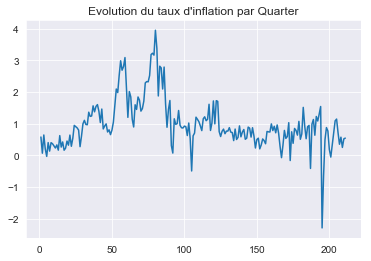

In [92]:
df.inf.dropna().plot(title="Evolution du taux d'inflation par Quarter")

### Interpréter l'autocorrélogramme et l'autocorrélogrammes partiels de inf. Quelle est la différence entre ces deux graphiques ?

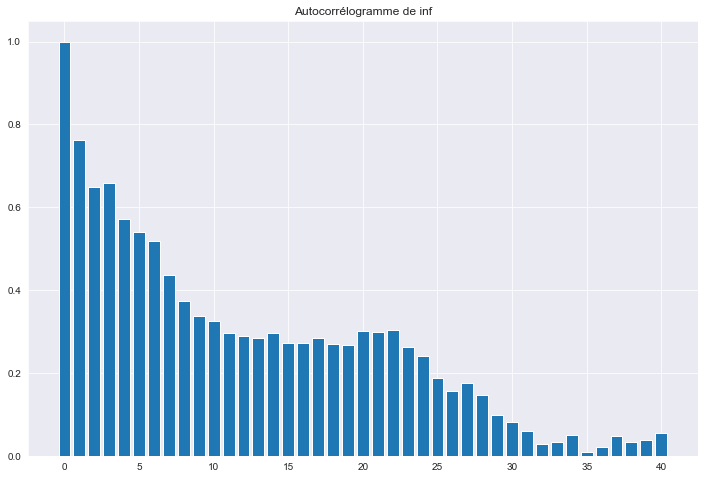

In [93]:
from statsmodels.tsa.stattools import acf
acf = acf(df.inf.dropna())
plt.figure(figsize=(12,8))
plt.bar(range(0, len(acf)),acf)
plt.title("Autocorrélogramme de inf")
plt.show()

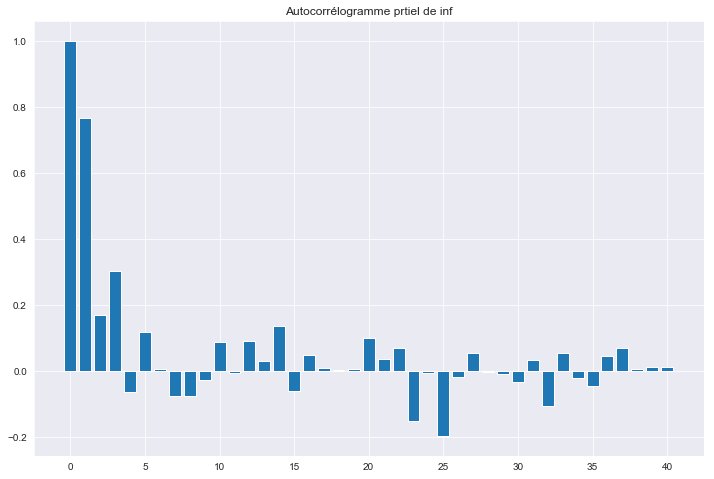

In [94]:
from statsmodels.tsa.stattools import pacf
pacf = pacf(np.array(df.inf.dropna()))
plt.figure(figsize=(12,8))
plt.bar(range(0, len(pacf)), pacf)
plt.title("Autocorrélogramme prtiel de inf")
plt.show()

L'autocorrélogramme représente la corrélation d'une variable avec elle-même après *k* laps de temps tandis que l'autocorrélogramme partiel va regarder à ces mêmes corrélations entre la variable à l'instant *t* et *t+k* tout en supprimant toutes les dépendances linéaires existantes entre la variable et les copies d'elle même entre les temps *t* et *t+k*.

### Quelle est la différence entre la stationnarité et l'ergodicité ? Pourquoi a-t-on besoin de ces deux conditions. Expliquez le terme "spurious regression".

La stationnarité traduit l'invariabilité des statistiques (moyenne, variance...) d'un processus en fonction du temps tandis que l'ergodicité traduit la possibilité de calculer les statistiques d'un processus par l'étude d'une portion de ce dernier. 



Le terme de "Spurious Regression" traduit la corrélation entre 2 variables en l'absence de causalité qui donne des résulats erronés si interprétés naïvement. Par exemple, associer le nombre de films dans lesquels Nicolas Cage apparaît et le nombre de personnes décédées en se noyant dans leur piscine serait une "Spurious Regression".

### Proposer une modélisation AR(p) de inf, en utilisant tous les outils vus au cours.

Un modèle autorégressif d'ordre *p* pour la variable *inf* se traduit de la manière suivante:
$inf_{t} = 	\Phi_{1} inf_{t-1} + \Phi_{2} inf_{t-2} +...+ \Phi_{p} inf_{t-p} + u_{t}$

En se référant à l'autocorrélogramme partiel vu Q3, on peut supposer que l'odre du modèle est de 3, les 4 premiers coefficients sont significatifs (mais on ne compte pas le tout premier car une variable est forcément auto-corrélée à elle-même). Vérifions le en utilisant le critère AIC vu en cours pour obtenir l'ordre *p* du modèle.

In [95]:
from statsmodels.tsa.ar_model import AR

AR = AR(df.inf.dropna())
AR_fit = AR.fit(ic='AIC')
print("Ordre du modèle retenu", AR_fit.df_model-1)

Ordre du modèle retenu 3


/Users/matyasamrouche/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


### Estimer le modèle de la courbe de Philips qui explique le taux de chômage (Unemp) en fonction du taux d’inflation courant et une constante.

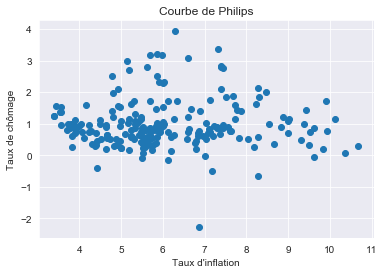

In [96]:
plt.scatter(df.Unemp, df.inf)
plt.xlabel("Taux d'inflation")
plt.ylabel("Taux de chômage")
plt.title("Courbe de Philips")
plt.show()

On veut expliquer *Unemp* en fonction de *inf* et une constante : $Unemp_{t}=\beta_{0}+\beta_{1}inf_{t}+r_{t}$

/Users/matyasamrouche/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


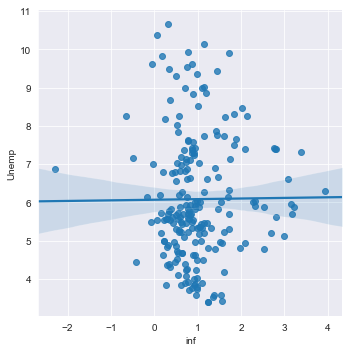

In [132]:
sns.lmplot(x='inf', y='Unemp', data=df)
plt.show()

In [193]:
X = pd.concat([pd.DataFrame(np.ones(212)), df.inf], axis=1)
X = X.dropna()
y = df.Unemp[1:]

# OLS
beta = np.linalg.inv(X.T@X)@X.T@y
residus = y - X@beta

In [176]:
print('Intercept =', beta[0])
print('Pente =', beta[1])

Intercept = 6.070818917241144
Pente = 0.015907987372646343


### Tester l’autocorrélation des erreurs.

On veut maintenant tester l'éventuelle présence d'autocorrélation dans les erreurs. Nos résidus sont donnés par : $r_{t} = \rho_{0} + \rho_{1} r_{t-1}+e_{t}$ , on va donc tester la significativité de la pente.

Considérons l'hypothès nulle $H_{0} : \rho = 0$

En faisant un régression sur $\hat r_{t} = \rho_{0} + \rho_{1} \hat r_{t-1}+e_{t}$ , on trouve $\hat \rho$. Pour tester la siginficativité de $\rho$ nous allons calculer la statistique $t_{\hat \rho}$ et ainsi estimer la *p-value* associée.

Si la *p-value* est suffisamment faible on pourra rejeter l'hypothèse $H_{0}$ et établir que les erreurs sont autocorrélées.

In [233]:
# Les résidus calculés Q6
y = residus[1:].reset_index(drop=True)

# Les résidus décalés de 1 step dans le temps 
X = pd.concat([pd.DataFrame(np.ones(211)), residus[:210].reset_index(drop=True).rename('pente')], axis=1)
X = X.dropna()

rho = np.linalg.inv(X.T@X)@X.T@y
e = y - X@rho
sigma_2 = e.T@e/210
std = np.sqrt(np.diag(sigma_2*(np.linalg.inv(X.T@X))))

# On a la statistique t associée à la siginificativité de la pente
statistique_test = rho[1]/std[1]

In [235]:
from scipy.stats import t

p_value = 2*(1 - t.cdf(statistique_test, 210)) 
print('p-value =', p_value)

p-value = 0.0


On rejette $H_{0}$, la pente est bien siginificative et les erreurs sont bien corrélées.

### Corriger l’autocorrélation des erreurs par la méthode vue en cours.

Nous allons transformer les données pour corriger l'autocorrélation présente dans les erreurs. Le modèle $PY = PX + Pu$ , a des erreurs homoscedastiques et indépendantes. Avec $P$ la matrice suivante :

\begin{bmatrix} 
\sqrt{1-\rho^2} & 0 & 0 & ... & ... & 0 \\
-\rho & 1 &  &  &  & ... \\
0 & -\rho & 1 &  &  &  \\
... &  & -\rho & 1 &  & ... \\
... &  &  & -\rho & 1 & 0 \\
0 & ... & ... & 0 & -\rho & 1 
\end{bmatrix}

$\rho$ étant la pente calculée Q7.

Il ne nous reste plus qu'à réaliser une régression linéaire sur les données transformées.

### Tester la stabilité de la relation chômage-inflation sur deux sous-périodes de taille identique.

### Faites les tests changement de structure de Chow et détecter le point de rupture.

### Estimer la courbe de Philips en supprimant l'inflation courante des variables explicatives mais en ajoutant les délais d’ordre 1, 2, 3 et 4 de l’inflation et du chômage. Faire le test de Granger de non causalité de l’inflation sur le chômage. Donnez la p-valeur.

### Représentez graphiquement les délais distribués et commentez. Calculer l’impact à long de terme de l’inflation sur le chômage.